In [1]:
%run Global.ipynb

In [2]:
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, BernoulliNB, GaussianNB

# SNB

In [3]:
train_df = pd.read_csv(RESOURCE_DIR + "train_df.csv", index_col = False, delimiter = ',', header=0)
X = train_df.iloc[:,:-1]
y = train_df[CLASS_LABEL]

## Multinomial NB

MultinomialNB prediction took 0.5794928073883057 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.723684    0.187394      0.297700       0.736072    0.961752   
1       0.732877    0.182283      0.291951       0.738498    0.970389   
2       0.750000    0.184300      0.295890       0.738274    0.971006   
3       0.700000    0.167235      0.269972       0.736496    0.967304   
4       0.748299    0.187713      0.300136       0.738129    0.968538   
5       0.668831    0.175768      0.278378       0.737340    0.961135   
6       0.722222    0.155290      0.255618       0.734637    0.973473   
7       0.753623    0.177474      0.287293       0.738663    0.974707   
8       0.727273    0.190801      0.302294       0.739254    0.966049   
9       0.723881    0.165247      0.269071       0.736817    0.966049   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.833913       0.378378    0.141414      0.205882  0.729519  

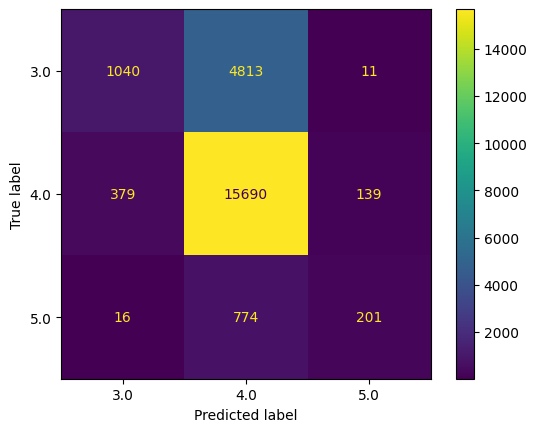

,mean,std
3.0_precision,0.725069,0.025484
3.0_recall,0.177351,0.011546
3.0_f1-score,0.284830,0.015805
4.0_precision,0.737418,0.001418
4.0_recall,0.968040,0.004524
4.0_f1-score,0.837132,0.002003
5.0_precision,0.577891,0.104693
5.0_recall,0.202869,0.039010
5.0_f1-score,0.299048,0.051987
accuracy,0.734120,0.003167


In [4]:
# Multinomial NB with alpha=0.1
mnb = MultinomialNB(alpha=0.1)
cross_val_report(mnb, X, y)[1]

In [5]:
# Hyperparameter tuning: Try different alpha values (Figure 4.0)
alpha = [0.01, 0.05, 0.1, 0.5, 1, 1.5, 2]
param_grid = {'alpha': alpha}
results = tune_hyperparameter(mnb, param_grid, X, y)
results

Fitting 20 folds for each of 7 candidates, totalling 140 fits
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.1s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END ......................................

[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.1s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ..........................................alpha=1.5; total time=   0.0s
[CV] END ...................

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,{'alpha': 0.01},0.722134,0.053205,6,0.178203,0.023495,1,0.285389,0.033022,1,...,7,0.199735,0.044323,2,0.294812,0.058445,2,0.733990,0.008671,5
1,{'alpha': 0.05},0.722511,0.052485,5,0.177692,0.023174,2,0.284779,0.032612,2,...,6,0.198755,0.044146,3,0.294034,0.058399,3,0.733990,0.008622,4
2,{'alpha': 0.1},0.723411,0.054193,4,0.177521,0.023212,3,0.284630,0.032769,3,...,5,0.200755,0.044158,1,0.297444,0.059768,1,0.734250,0.008723,2
3,{'alpha': 0.5},0.720769,0.055485,7,0.173601,0.022854,4,0.279393,0.032603,4,...,4,0.181592,0.042756,4,0.281106,0.061133,4,0.734163,0.008415,3
4,{'alpha': 1},0.730222,0.056758,3,0.168140,0.022084,5,0.272891,0.031573,5,...,3,0.161388,0.041703,5,0.260542,0.061928,5,0.734640,0.007440,1
5,{'alpha': 1.5},0.734235,0.053270,2,0.159615,0.022369,6,0.261781,0.032145,6,...,2,0.140245,0.037012,6,0.234133,0.057107,6,0.733470,0.007334,6
6,{'alpha': 2},0.739869,0.055941,1,0.152451,0.020555,7,0.252381,0.030053,7,...,1,0.128204,0.033678,7,0.218768,0.051692,7,0.732776,0.006795,7


In [7]:
# Look at the precision-recall trade-off
precision_3 = results['rank_test_3.0_precision'].values
recall_3 = results['rank_test_3.0_recall'].values
precision_4 = results['rank_test_4.0_precision'].values
recall_4 = results['rank_test_4.0_recall'].values
precision_5 = results['rank_test_5.0_precision'].values
recall_5 = results['rank_test_5.0_recall'].values

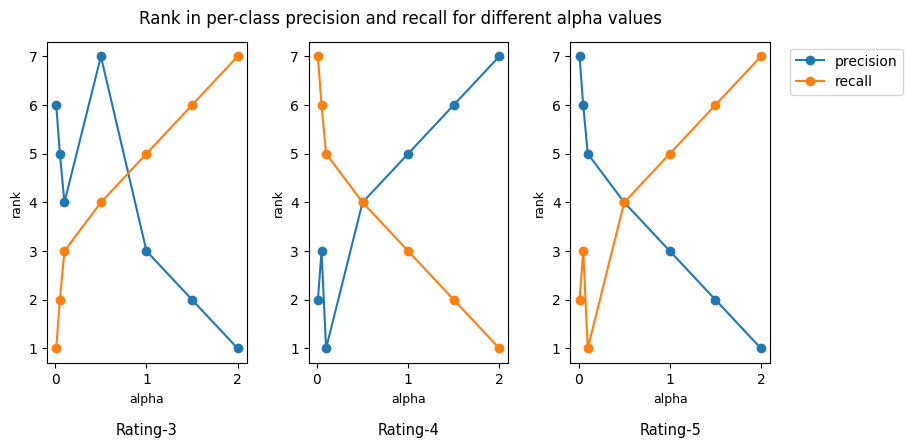

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 4))
fig.tight_layout()

fig.suptitle('Rank in per-class precision and recall for different alpha values')
fig.subplots_adjust(top=0.9)

ax1.set_title('Rating-3', y=-0.25, fontsize=10.5)
ax1.plot(alpha, precision_3, '-o')
ax1.plot(alpha, recall_3, '-o')
ax1.set_xlabel('alpha\n', fontsize=9)
ax1.set_ylabel('rank', fontsize=9)

ax2.set_title('Rating-4', y=-0.25, fontsize=10.5)
ax2.plot(alpha, precision_4, '-o')
ax2.plot(alpha, recall_4, '-o')
ax2.set_xlabel('alpha\n', fontsize=9)
ax2.set_ylabel('rank', fontsize=9)

l1, = ax3.plot(alpha, precision_5, '-o')
l2, = ax3.plot(alpha, recall_5, '-o')
ax3.set_xlabel('alpha\n', fontsize=9)
ax3.set_ylabel('rank', fontsize=9)
ax3.legend([l1,l2], ['precision', 'recall'], loc='upper right', bbox_to_anchor=(1.2, 0.5, 0.5, 0.5))
ax3.set_title('Rating-5', y=-0.25, fontsize=10.5)

plt.savefig(RESOURCE_DIR+'MNB_Precision_Recall.png')
plt.show()

## Multinomial NB + Gaussian NB

In [9]:
GNB_FEATURES = ['pagesNumber', 'PublishYear']
BNB_FEATURES = read_list(RESOURCE_DIR + "BNB_features.txt")
MNB_FEATURES = read_list(RESOURCE_DIR + "MNB_features.txt")

In [10]:
from mlxtend.classifier import StackingCVClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline

In [12]:
gnb = make_pipeline(GaussianNB())
mnb = make_pipeline(ColumnSelector(BNB_FEATURES+MNB_FEATURES), 
                    MultinomialNB(alpha=0.6))

gm_cvsnb = StackingCVClassifier(classifiers=[gnb, mnb], 
                            meta_classifier=CategoricalNB(),
                            random_state=30027)

gm_cvsnb.fit(X, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('gaussiannb',
                                                   GaussianNB())]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors_',
                                                                        'Authors_aaron '
                                                                        'mccollough',
                                                                        'Authors_abu '
                                                                        'hamid '
                                                                        'al '
                                                                        'ghazali',
                                                                        'Authors_agatha '
                                                                        'christie',
                                                                        'Authors_alba '
                                                                        'de c '
                                                                        'spedes',
                                                                        'Authors_alexander '
                                                                        'kent',
                                                                        'Authors_alexander '
                                                                        'schmemann',
                                                                        'Authors_alexandre '
                                                                        'dumas',
                                                                        'Au...
                                                                        'mcgrath',
                                                                        'Authors_barbara '
                                                                        'kuhn '
                                                                        'timby',
                                                                        'Authors_bedi '
                                                                        'zzaman '
                                                                        'said '
                                                                        'nurs',
                                                                        'Authors_beth '
                                                                        'moore',
                                                                        'Authors_beverly '
                                                                        'brandt',
                                                                        'Authors_bill '
                                                                        'ashcroft',
                                                                        'Authors_bill '
                                                                        'watterson',
                                                                        'Authors_bill '
                                                                        'willingham',
                                                                        'Authors_bradley '
                                                                        'jersak',
                                                                        'Authors_brenda '
                                                                        'jackson', ...])),
                                                  ('multinomialnb',
                                                   MultinomialNB(alpha=0.6))])],
                     meta_classifier=CategoricalNB(), random_state=30027)

StackingCVClassifier prediction took 4.1015191078186035 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.690722    0.228279      0.343150       0.743996    0.955583   
1       0.645000    0.219761      0.327827       0.742665    0.952498   
2       0.668449    0.213311      0.323415       0.740688    0.956817   
3       0.611940    0.209898      0.312579       0.739884    0.947563   
4       0.673797    0.215017      0.326003       0.739752    0.957434   
5       0.639175    0.211604      0.317949       0.743146    0.953115   
6       0.648352    0.201365      0.307292       0.740458    0.957434   
7       0.677083    0.221843      0.334190       0.743663    0.959284   
8       0.647368    0.209540      0.316602       0.739464    0.953086   
9       0.628415    0.195911      0.298701       0.739234    0.953704   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836619       0.451613    0.141414      0.215385  0.7

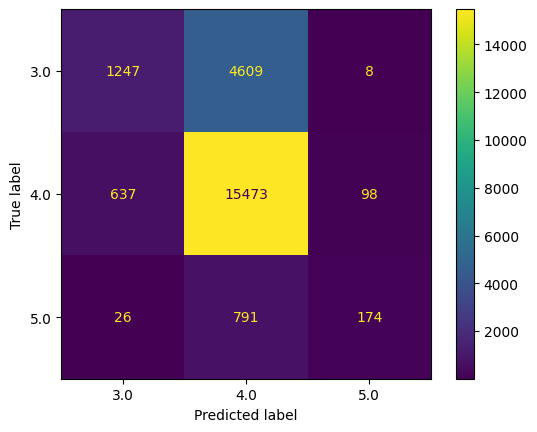

,mean,std
3.0_precision,0.653030,0.024205
3.0_recall,0.212653,0.009494
3.0_f1-score,0.320771,0.013022
4.0_precision,0.741295,0.001863
4.0_recall,0.954652,0.003384
4.0_f1-score,0.834550,0.001963
5.0_precision,0.621368,0.100909
5.0_recall,0.175616,0.037398
5.0_f1-score,0.273015,0.053483
accuracy,0.732515,0.003297


In [13]:
y_pred, gm_cvsnb_report = cross_val_report(gm_cvsnb, X, y)
gm_cvsnb_report

## Multinomial NB + Gaussian NB + BernoulliNB

Note: This section is the same as Section "2) Stacking Naive Bayes" in  `Main.ipynb`

In [14]:
gnb = make_pipeline(ColumnSelector(GNB_FEATURES),
                      GaussianNB(var_smoothing=0.1))
bnb = make_pipeline(ColumnSelector(BNB_FEATURES),
                      BernoulliNB(alpha=0.1))
mnb = make_pipeline(ColumnSelector(MNB_FEATURES),
                      MultinomialNB(alpha=0.01))

cvsnb = StackingCVClassifier(classifiers=[gnb, bnb, mnb], 
                            meta_classifier=CategoricalNB(alpha=0.01),
                            random_state=30027)

cvsnb.fit(X, y)

StackingCVClassifier(classifiers=[Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['pagesNumber',
                                                                        'PublishYear'])),
                                                  ('gaussiannb',
                                                   GaussianNB(var_smoothing=0.1))]),
                                  Pipeline(steps=[('columnselector',
                                                   ColumnSelector(cols=['Authors_',
                                                                        'Authors_aaron '
                                                                        'mccollough',
                                                                        'Authors_abu '
                                                                        'hamid '
                                                                        'al '
                                                                        'ghazali',
                                                                        'Authors_agatha '
                                                                        'christie',
                                                                        'Authors_alba '
                                                                        'de c '
                                                                        'spedes',...
                                                                        'year '
                                                                        'old',
                                                                        'year '
                                                                        'ago',
                                                                        'short '
                                                                        'story',
                                                                        'time '
                                                                        'br',
                                                                        'first '
                                                                        'time',
                                                                        'around '
                                                                        'world',
                                                                        'best '
                                                                        'selling',
                                                                        'civil '
                                                                        'war',
                                                                        'book '
                                                                        'br',
                                                                        'united '
                                                                        'state',
                                                                        'full '
                                                                        'color',
                                                                        'th '
                                                                        'century',
                                                                        'br '
                                                                        'new',
                                                                        'available '
                                                                        'purchase',
                                                                        'step '
                                                                        'step',
                                                                        'well '
                          

StackingCVClassifier prediction took 3.346590042114258 seconds.

   3.0_precision  3.0_recall  3.0_f1-score  4.0_precision  4.0_recall  \
0       0.738562    0.192504      0.305405       0.738884    0.963603   
1       0.705521    0.195911      0.306667       0.740548    0.966687   
2       0.751592    0.201365      0.317631       0.741631    0.970389   
3       0.713333    0.182594      0.290761       0.738701    0.967921   
4       0.751592    0.201365      0.317631       0.740462    0.969772   
5       0.712418    0.186007      0.294993       0.740898    0.966687   
6       0.696296    0.160410      0.260749       0.735514    0.971006   
7       0.743243    0.187713      0.299728       0.740254    0.972239   
8       0.733766    0.192504      0.304993       0.739274    0.967901   
9       0.699301    0.170358      0.273973       0.737488    0.964198   

   4.0_f1-score  5.0_precision  5.0_recall  5.0_f1-score  accuracy  
0      0.836412       0.425000    0.171717      0.244604  0.73

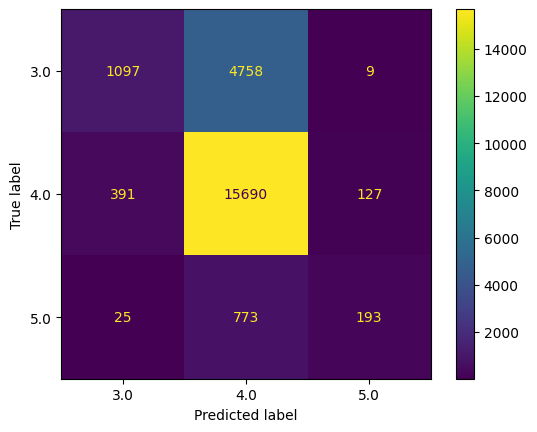

,mean,std
3.0_precision,0.724563,0.021510
3.0_recall,0.187073,0.013155
3.0_f1-score,0.297253,0.018176
4.0_precision,0.739365,0.001823
4.0_recall,0.968040,0.002850
4.0_f1-score,0.838387,0.001675
5.0_precision,0.593464,0.094156
5.0_recall,0.194788,0.034858
5.0_f1-score,0.291778,0.045721
accuracy,0.736244,0.002972


In [16]:
y_pred_cvsnb, cvsnb_report = cross_val_report(cvsnb, X, y)
cvsnb_report

## Hyperparameter tuning: Nested GridSearchCV

In [26]:
param_grid = {'pipeline-1__gaussiannb__var_smoothing': [0.1, 1e-3, 1e-5, 1e-7, 1e-9, 1e-11],
              'pipeline-2__bernoullinb__alpha': [0.01, 0.1, 0.5, 1],
              'pipeline-3__multinomialnb__alpha': [0.01, 0.1, 0.5, 1],
              'meta_classifier__alpha': [0.01, 0.1, 0.5, 1]}

gs_results = tune_hyperparameter(cvsnb, param_grid, X, y, cv=3)
gs_results

Fitting 3 folds for each of 384 candidates, totalling 1152 fits
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.6s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussian

[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.01,

[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=0.01, pi

[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=0.01, pipeline

[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__

[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=0.01, pipeline-3__mult

[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.01, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multi

[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1;

[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomial

[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomi

[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multino

[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multino

[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.2s
[CV] END meta_classifier__alpha=0.1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multin

[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alp

[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.5; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multin

[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multi

[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__mult

[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__mult

[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=0.5, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__mult

[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.1, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.1; to

[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=0.001, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__a

[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-05, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__a

[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-07, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__a

[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-09, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__a

[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=0.5, pipeline-3__multinomialnb__alpha=1; total time=   0.2s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__alpha=0.01; total time=   0.3s
[CV] END meta_classifier__alpha=1, pipeline-1__gaussiannb__var_smoothing=1e-11, pipeline-2__bernoullinb__alpha=1, pipeline-3__multinomialnb__a

,params,mean_test_3.0_precision,std_test_3.0_precision,rank_test_3.0_precision,mean_test_3.0_recall,std_test_3.0_recall,rank_test_3.0_recall,mean_test_3.0_f1-score,std_test_3.0_f1-score,rank_test_3.0_f1-score,...,rank_test_5.0_precision,mean_test_5.0_recall,std_test_5.0_recall,rank_test_5.0_recall,mean_test_5.0_f1-score,std_test_5.0_f1-score,rank_test_5.0_f1-score,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,"{'meta_classifier__alpha': 0.01, 'pipeline-1__...",0.710220,0.017418,369,0.178205,0.003748,1,0.284888,0.005443,1,...,201,0.197784,0.015172,1,0.293561,0.017380,1,0.733686,0.001713,177
1,"{'meta_classifier__alpha': 0.01, 'pipeline-1__...",0.710220,0.017418,369,0.178205,0.003748,1,0.284888,0.005443,1,...,201,0.197784,0.015172,1,0.293561,0.017380,1,0.733686,0.001713,177
2,"{'meta_classifier__alpha': 0.01, 'pipeline-1__...",0.710220,0.017418,369,0.178205,0.003748,1,0.284888,0.005443,1,...,217,0.197784,0.015172,1,0.293140,0.017813,9,0.733599,0.001592,293
3,"{'meta_classifier__alpha': 0.01, 'pipeline-1__...",0.710015,0.017474,381,0.178035,0.003987,13,0.284652,0.005750,73,...,261,0.197784,0.015172,1,0.292676,0.017189,13,0.733513,0.001652,341
4,"{'meta_classifier__alpha': 0.01, 'pipeline-1__...",0.711380,0.018974,353,0.177864,0.003461,77,0.284539,0.005054,97,...,193,0.193756,0.015199,97,0.289525,0.017549,97,0.733729,0.001858,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,"{'meta_classifier__alpha': 1, 'pipeline-1__gau...",0.727508,0.017730,71,0.167633,0.001431,269,0.272452,0.002156,279,...,169,0.179633,0.018878,193,0.278954,0.022961,265,0.733816,0.001405,83
380,"{'meta_classifier__alpha': 1, 'pipeline-1__gau...",0.725956,0.017850,97,0.163029,0.001886,301,0.266213,0.001521,301,...,1,0.136239,0.013209,289,0.232462,0.017940,289,0.733816,0.001580,93
381,"{'meta_classifier__alpha': 1, 'pipeline-1__gau...",0.725956,0.017850,97,0.163029,0.001886,301,0.266213,0.001521,301,...,1,0.136239,0.013209,289,0.232462,0.017940,289,0.733816,0.001580,93
382,"{'meta_classifier__alpha': 1, 'pipeline-1__gau...",0.725956,0.017850,97,0.163029,0.001886,301,0.266213,0.001521,301,...,49,0.136239,0.013209,289,0.232060,0.018046,337,0.733729,0.001463,145


## Sample code: Looking at the wrong predictions

In [21]:
# index of rating-3 instances misclassified as rating-4
wrong_3_as_4 = [i for i in range(len(y_pred_cvsnb)) if y_pred_cvsnb[i] != y[i] and y_pred_cvsnb[i] == 4 and y[i] == 3]

features = GNB_FEATURES + BNB_FEATURES + MNB_FEATURES
# average of these misclassified instances' feature values
wrong_3_as_4_avg = train_df.iloc[wrong_3_as_4,:][features].mean()
wrong_3_as_4_avg

pagesNumber                     0.138679
PublishYear                     0.909971
Authors_                        0.000210
Authors_aaron mccollough        0.000000
Authors_abu hamid al ghazali    0.000000
                                  ...   
step step                       0.005835
well known                      0.007650
real life                       0.025767
african american                0.011791
san francisco                   0.008712
Length: 531, dtype: float64

In [19]:
# average of the entire training set
train_avg = train_df[features].mean()
train_avg

pagesNumber                     0.159794
PublishYear                     0.903618
Authors_                        0.000434
Authors_aaron mccollough        0.000043
Authors_abu hamid al ghazali    0.000043
                                  ...   
step step                       0.008487
well known                      0.010836
real life                       0.021435
african american                0.013000
san francisco                   0.006491
Length: 531, dtype: float64

In [22]:
# where the misclassifications' average is below the training-set average
less_than = wrong_3_as_4_avg.loc[[c for c in wrong_3_as_4_avg.index if wrong_3_as_4_avg[c] < train_avg[c]]]
less_than

pagesNumber                     0.138679
Authors_                        0.000210
Authors_aaron mccollough        0.000000
Authors_abu hamid al ghazali    0.000000
Authors_agatha christie         0.000210
                                  ...   
br new                          0.012512
available purchase              0.009001
step step                       0.005835
well known                      0.007650
african american                0.011791
Length: 484, dtype: float64

In [25]:
# Specifically, the below-average numerical, 'Names' and 'Descriptions' features
less_than.loc[[c for c in less_than.index if not c.startswith('Publisher_') and not c.startswith('Authors_')]]

pagesNumber           0.138679
gay_lesbian           0.000780
new_york              0.000000
th_century            0.000000
survival_guide        0.000420
essential_guide       0.000000
complete_guide        0.001261
complete_idiot        0.000000
idiot_guide           0.000000
true_story            0.000420
choose_adventure      0.001471
br br                 0.003889
new york              0.008197
year ago              0.005500
around world          0.009274
best selling          0.007272
civil war             0.012460
book br               0.010285
th century            0.008707
br new                0.012512
available purchase    0.009001
step step             0.005835
well known            0.007650
african american      0.011791
dtype: float64